# Context
The "Taxi Trajectory Data" dataset is a collection of GPS trajectories of taxis in the city of Porto, Portugal. The data was collected between July 1st, 2013 and June 30th, 2014, and includes trips taken by taxis both inside and outside of the city limits.

In [3]:
# Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt

# Data Exploration and Visualization:

## Explain the data. Find the features in the dataset. Print their names and dimensions.


This dataset has 1710670 instances. Each instance corresponds to one completed trip and contains a total of 9 features, described as follows: 

- TRIP_ID: (String) It contains an unique identifier for each trip.
- CALL_TYPE: (char) It identifies the way used to demand this service. It may contain one of three possible values:
    - ‘A’ if this trip was dispatched from the central.
    - ‘B’ if this trip was demanded directly to a taxi driver on a specific stand.
    - ‘C’ otherwise (i.e. a trip demanded on a random street).
- ORIGIN_CALL: (integer) It contains an unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALL_TYPE=’A’. Otherwise, it assumes a NULL value.
- ORIGIN_STAND: (integer): It contains an unique identifier for the taxi stand. It identifies the starting point of the trip if CALL_TYPE=’B’. Otherwise, it assumes a NULL value.
- TAXI_ID: (integer): It contains an unique identifier for the taxi driver that performed each trip.
- TIMESTAMP: (integer) Unix Timestamp (in seconds). It identifies the trip’s start.
- DAYTYPE: (char) It identifies the daytype of the trip’s start. It assumes one of three possible values:
    - ‘B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.).
    - ‘C’ if the trip started on a day before a type-B day.
    - ‘A’ otherwise (i.e. a normal day, workday or weekend).
- MISSING_DATA: (Boolean) It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing.
- POLYLINE: (String): It contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of trip. The last list item corresponds to the trip’s destination while the first one represents its start.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [81]:
# Load the dataset
taxi_df = pd.read_csv("/content/drive/MyDrive/Dataset-Fereshteh/train.csv")

In [10]:
# Print the feature names
print("The feature names:")
print(list(taxi_df.columns))

The feature names:
['TRIP_ID', 'CALL_TYPE', 'ORIGIN_CALL', 'ORIGIN_STAND', 'TAXI_ID', 'TIMESTAMP', 'DAY_TYPE', 'MISSING_DATA', 'POLYLINE']


In [11]:
# Print the dimensions of the dataset
print("The dimensions of the dataset:")
print(taxi_df.shape)

The dimensions of the dataset:
(1710670, 9)


In [13]:
# Print the first five instances of the dataset.
taxi_df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [26]:
# Print the the number of unique values in each feature (feature's cardinality)
taxi_df.nunique()

TRIP_ID         1710589
CALL_TYPE             3
ORIGIN_CALL       57105
ORIGIN_STAND         63
TAXI_ID             448
TIMESTAMP       1655366
DAY_TYPE              1
MISSING_DATA          2
POLYLINE        1703650
dtype: int64

In [25]:
taxi_df.CALL_TYPE.unique()

array(['C', 'B', 'A'], dtype=object)

We can extract some useful information about the dataset using the commands above. For example, the total number of taxi drivers is 448 or some of the trip ids are repeated because the total number of instance is 1710670 while the count of unique values for 'TRIP_ID' feature is 1710589. Also, the variance of feature 'DAY_TYPE' is zero which means it can be removed as it has no helpful information about the trips (Instead of dedicating a column to this feature in the dataset, it can be mentioned in the description of the dataset that the day_type of all trips is 'A').

## Plot the data distribution of a few features. Discuss about their mean and variance.

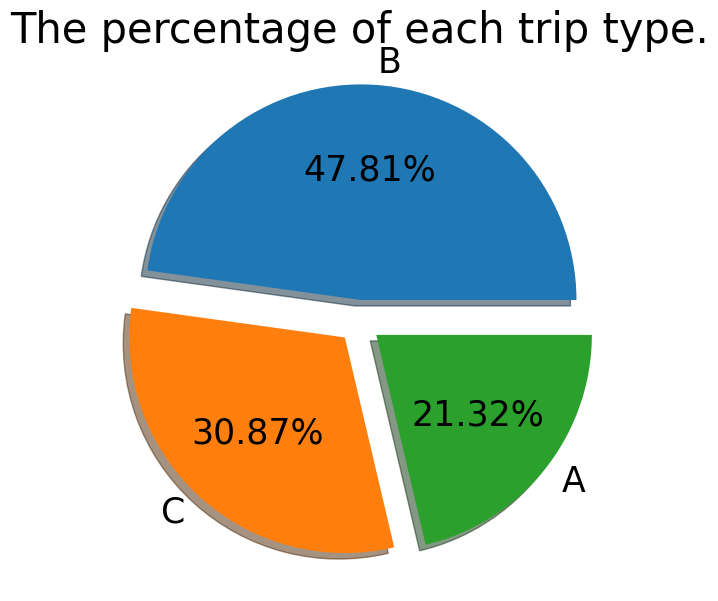

In [56]:
plt.figure(figsize=(13,7))
explode = (0.1, 0.1, 0.1)
plt.rc('font', size=25)
ax = plt.pie(
        explode = explode
        ,labels = taxi_df.CALL_TYPE.value_counts().keys()
        ,x = taxi_df.CALL_TYPE.value_counts().values
        ,shadow=True
        ,autopct='%1.2f%%')
plt.title("The percentage of each trip type.")
plt.show()

In this dataset there are three types of trip which the pie chart above illustrates their percentages. As it can be seen, almost half of the trips belong to type B. 

In [43]:
print("The number of trips that their ORIGIN_STAND is not null: ")
taxi_df.ORIGIN_STAND.count()

The number of trips that their ORIGIN_STAND is not null: 


806579

In [47]:
print("The ORIGIN_STAND of the trips above can be a value between 1 to 63.")
taxi_df.ORIGIN_STAND.unique()

The ORIGIN_STAND of the trips above can be a value between 1 to 63.


array([nan,  7., 13., 28., 38., 52., 23., 22., 57., 34., 15., 18., 47.,
        9., 30., 51., 60., 12., 58., 25., 14., 33., 61., 53., 36., 20.,
       56., 42., 24.,  6., 35., 26., 27.,  1., 21., 11.,  8., 55.,  3.,
       16., 17., 40., 32., 59., 63., 62., 45., 54., 29., 10., 49., 37.,
       19., 31., 39.,  2., 44., 50., 43., 46., 41.,  5.,  4., 48.])

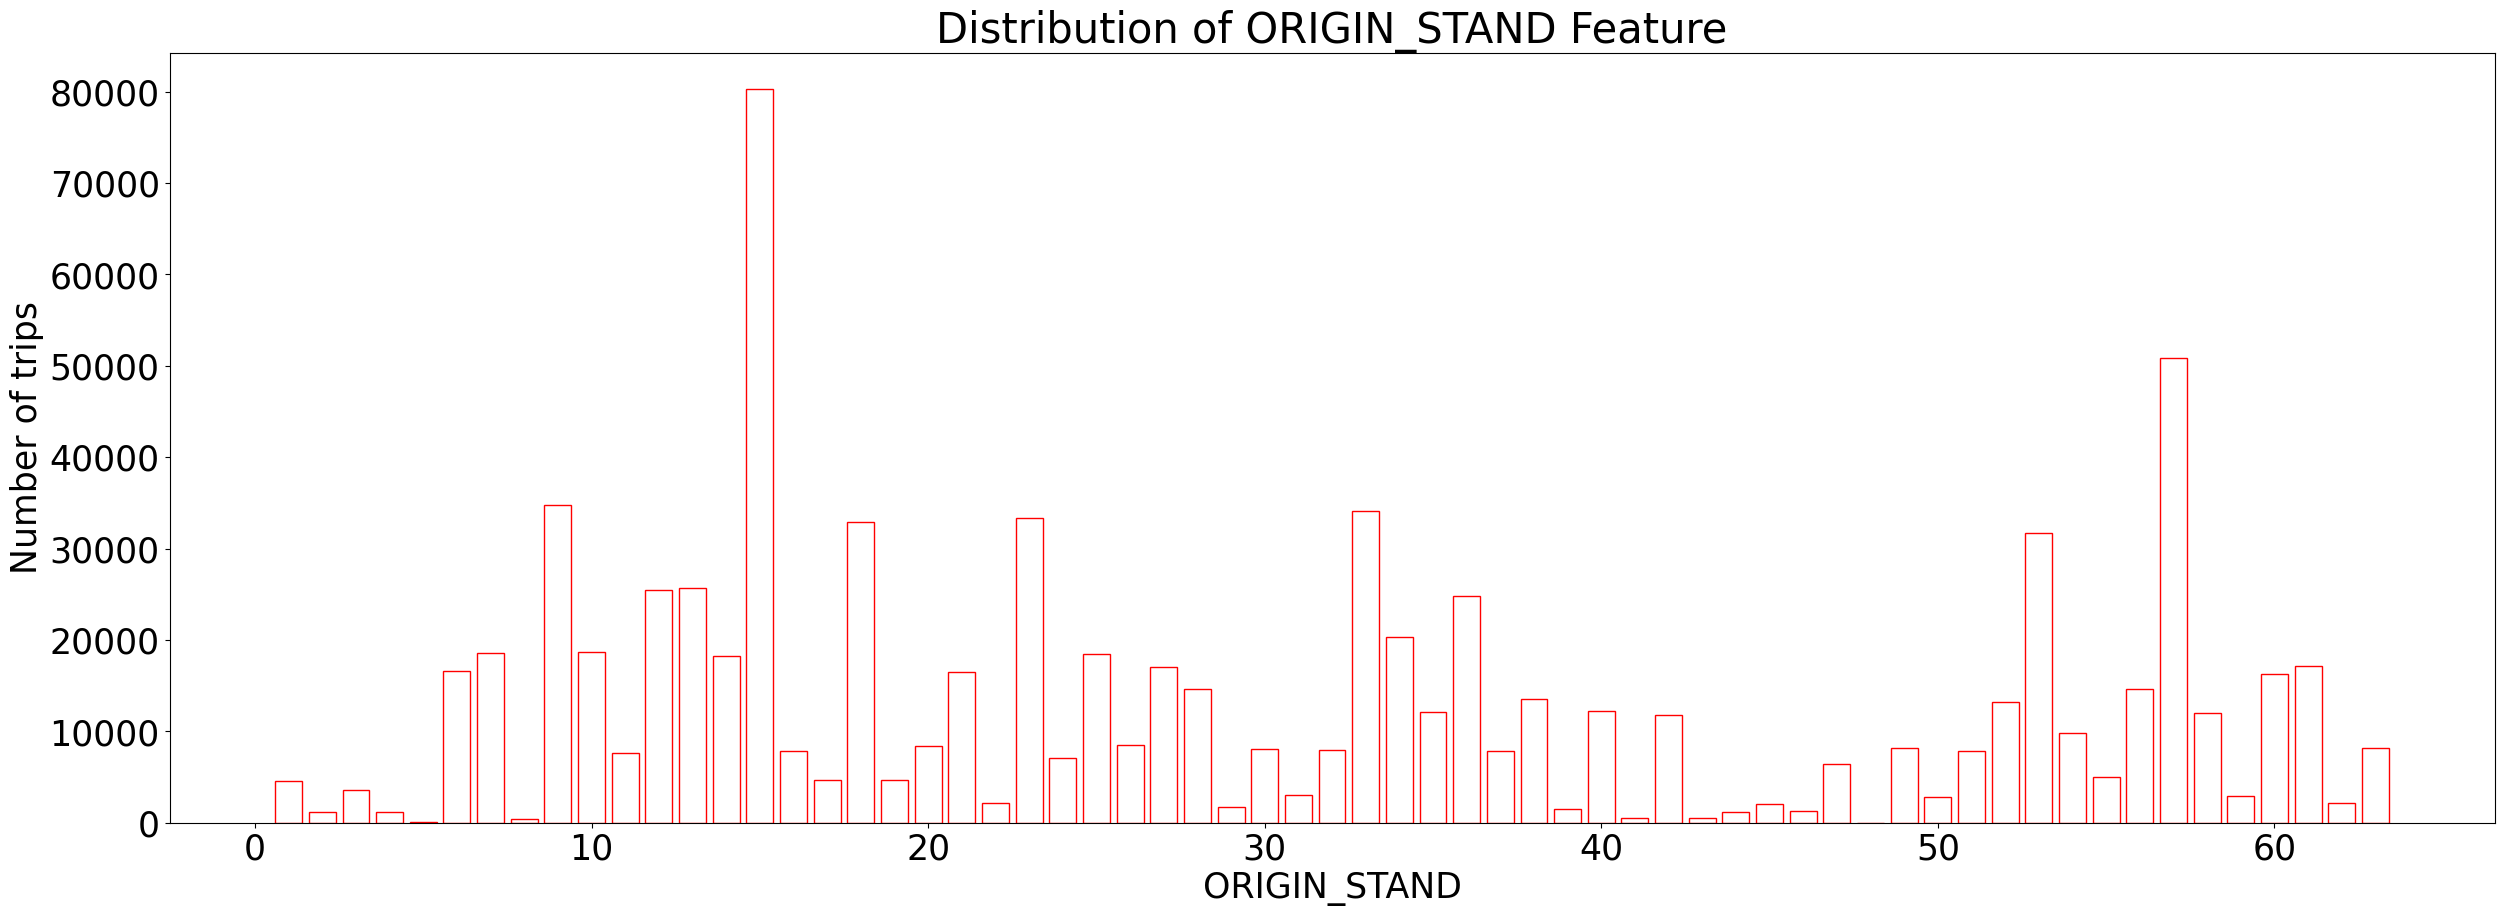

In [71]:
plt.figure(figsize=(30,10))
ax = plt.bar(
        taxi_df.ORIGIN_STAND.value_counts().keys()
        , taxi_df.ORIGIN_STAND.value_counts().values
        , color = 'w'
        , edgecolor = 'r')
plt.title("Distribution of ORIGIN_STAND Feature")
plt.xlabel('ORIGIN_STAND')
plt.ylabel('Number of trips')
plt.show()

With the help of plot above, We can identify the stands where had much more (or less) trips compared to other stands.

Mean and variance are helpful to give us insights into numeric features. However, the features of this dataset are not numeric (such as weight, price, etc.). In order to get to know categorical features we can calculate their cardinalities and the percentage of each group.

# Data Pre-processing:

## Data cleaning: Find missing data. Remove them and justify your choice.

According to the outputs below, most of the instances (almost 80%) have a null value for ORIGIN_CALL, so it is reasonable to drop this feature.

The other feature that has missing values is ORIGIN_STAND. Based on dataset's description, this feature contains an unique identifier for the taxi stand. It identifies the starting point of the trip if CALL_TYPE=’B’. Otherwise, it assumes a NULL value. So, a reasonable method to remove these null values is to replace them with a fixed value (such as zero) as they only identify a different type of trips. Filling these null values with mean or mode does not make sence in this feature. Also, similare to previous feature, we can drop it if we don't consider it helpful. 

In [57]:
# Check for missing data
print(taxi_df.isnull().sum())

TRIP_ID               0
CALL_TYPE             0
ORIGIN_CALL     1345900
ORIGIN_STAND     904091
TAXI_ID               0
TIMESTAMP             0
DAY_TYPE              0
MISSING_DATA          0
POLYLINE              0
dtype: int64


In [65]:
print("The percentage of instances with null value for ORIGIN_CALL feature:")
taxi_df.ORIGIN_CALL.isnull().sum() / taxi_df.shape[0]

The percentage of instances with null value for ORIGIN_CALL feature:


0.7867677576622025

In [83]:
taxi_df = taxi_df.drop(['ORIGIN_CALL'], axis=1)

In [84]:
# The shape of new dataset with one fewer feature.
taxi_df.shape

(1710670, 8)

In [85]:
# replacing na values in ORIGIN_STAND feature with zero
taxi_df["ORIGIN_STAND"].fillna(0, inplace = True)

In [86]:
# Check for missing data
print(taxi_df.isnull().sum())

TRIP_ID         0
CALL_TYPE       0
ORIGIN_STAND    0
TAXI_ID         0
TIMESTAMP       0
DAY_TYPE        0
MISSING_DATA    0
POLYLINE        0
dtype: int64


## Data Cleaning: Identify noise in the data. How did you identify the noise? Justify and demonstrate the technique you would use to reduce noise.


One way to identify noise in the data is to plot the distribution of a feature and look for outliers. Also, we can use the z-score method to identify and remove outliers for the data which is completely or close to normally distributed. Another technique which can be used for skewed data is Inter quartile range (IQR) method. However we cannot exploit such methods as our features are not numeric. 

According to first section of this file, some of the trips (instances) are repeated, so we should remove them in this cleaning stage.

In [87]:
taxi_df.shape

(1710670, 8)

In [88]:
# Delete duplicate rows based on specific columns while keeping the first 
taxi_df = taxi_df.drop_duplicates(subset=["TRIP_ID"], keep='first')

In [89]:
taxi_df.shape

(1710589, 8)

In [90]:
# Print the the number of unique values in each feature (feature's cardinality)
taxi_df.nunique()

TRIP_ID         1710589
CALL_TYPE             3
ORIGIN_STAND         64
TAXI_ID             448
TIMESTAMP       1655366
DAY_TYPE              1
MISSING_DATA          2
POLYLINE        1703576
dtype: int64

## Data transformations: Perform standardizations and normalization. Justify your chosen normalization method.


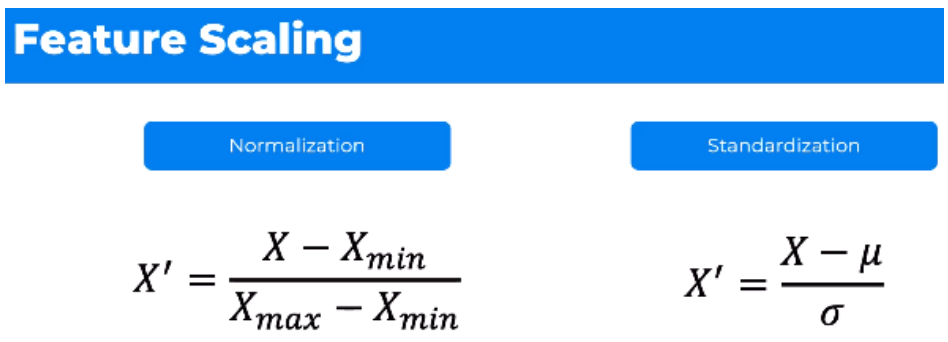

Feature scaling is applied to ensure that all features have the same scale and range, which helps in improving the performance of machine learning algorithms. It helps to avoid biases towards certain features that may have larger values and can impact the accuracy of the model. Additionally, it can also help to speed up the convergence of the algorithms during training. Standardization and normalization can only be applied to numeric features. In this dataset only 'TIMESTAMP' is numeric, but applying feature scalling to such feature is not sensible. It would be better to convert this feature to other date/time based features such as day, month, year, hour, etc. 

## Any other techniques which are required for your dataset such as adding data head.


Some trips in this dataset are empty which means the value of their 'POLYLINE' feature is "[]". Since our dataset is large enough, removing these empty trips does not have a serious impact on our dataset.

Also, 10 trips have missing values in their 'POLYLINE' feature according to values of 'MISSING_DATA' feature. We can also remove these 10 trips and after that all values of 'MISSING_DATA' feature would be False, so we can drop that feature as well.

In [96]:
count = taxi_df.POLYLINE.value_counts()['[]']
print('The number of trips with empty polyline:')
print(count)

The number of trips with empty polyline:
5897


In [97]:
# remove empty polyline
taxi_df = taxi_df[taxi_df.POLYLINE != '[]']

In [98]:
taxi_df.shape

(1704692, 8)

In [99]:
# View the first 5 rows of the dataset
count = taxi_df.MISSING_DATA.value_counts()
count

False    1704682
True          10
Name: MISSING_DATA, dtype: int64

In [100]:
# remove missing GPS data
taxi_df = taxi_df[taxi_df.MISSING_DATA != True]

In [102]:
taxi_df = taxi_df.drop(['MISSING_DATA'], axis=1)

In [103]:
taxi_df.shape

(1704682, 7)